In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense

In [62]:
data=pd.read_csv("/content/riceClassification.csv")

In [63]:
data.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [65]:
data.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

In [66]:
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [67]:
data=data.drop("id",axis=1)

In [68]:
data.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  4537        92.229316        64.012769      0.719916        4677   
1  2872        74.691881        51.400454      0.725553        3015   
2  3048        76.293164        52.043491      0.731211        3132   
3  3073        77.033628        51.928487      0.738639        3157   
4  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [69]:
data["Class"].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

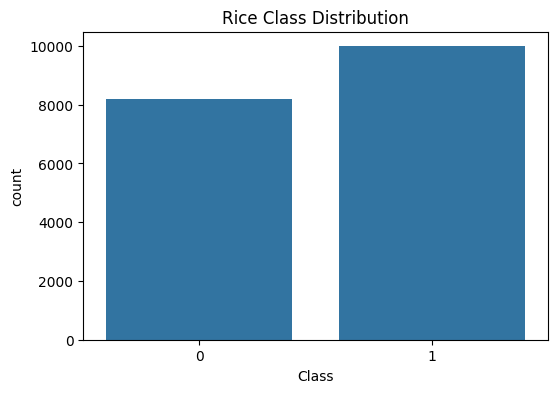

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=data)
plt.title("Rice Class Distribution")
plt.show()

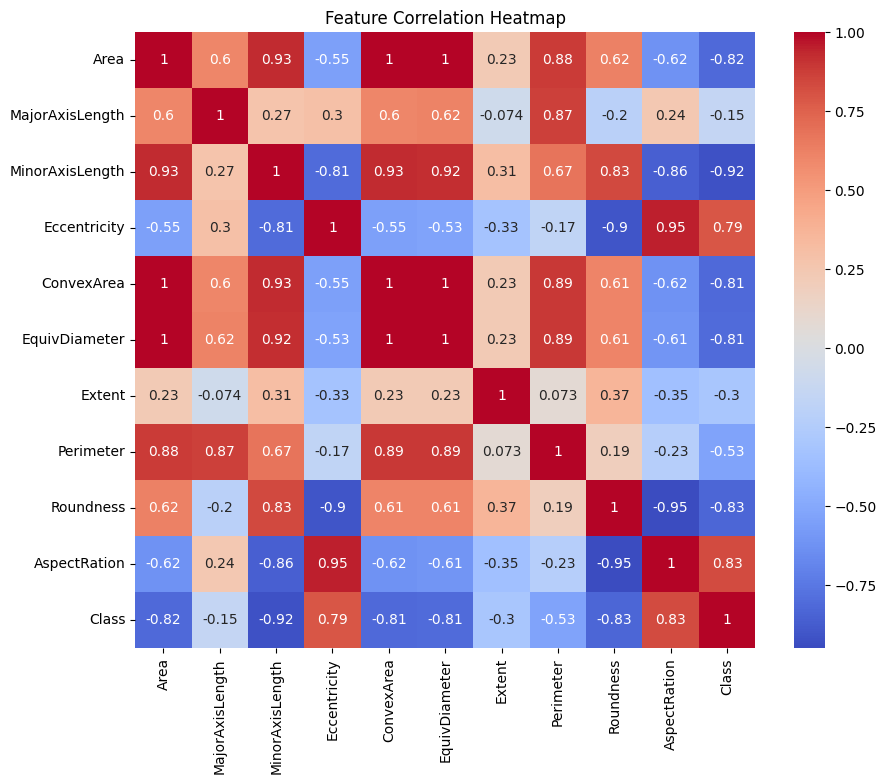

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

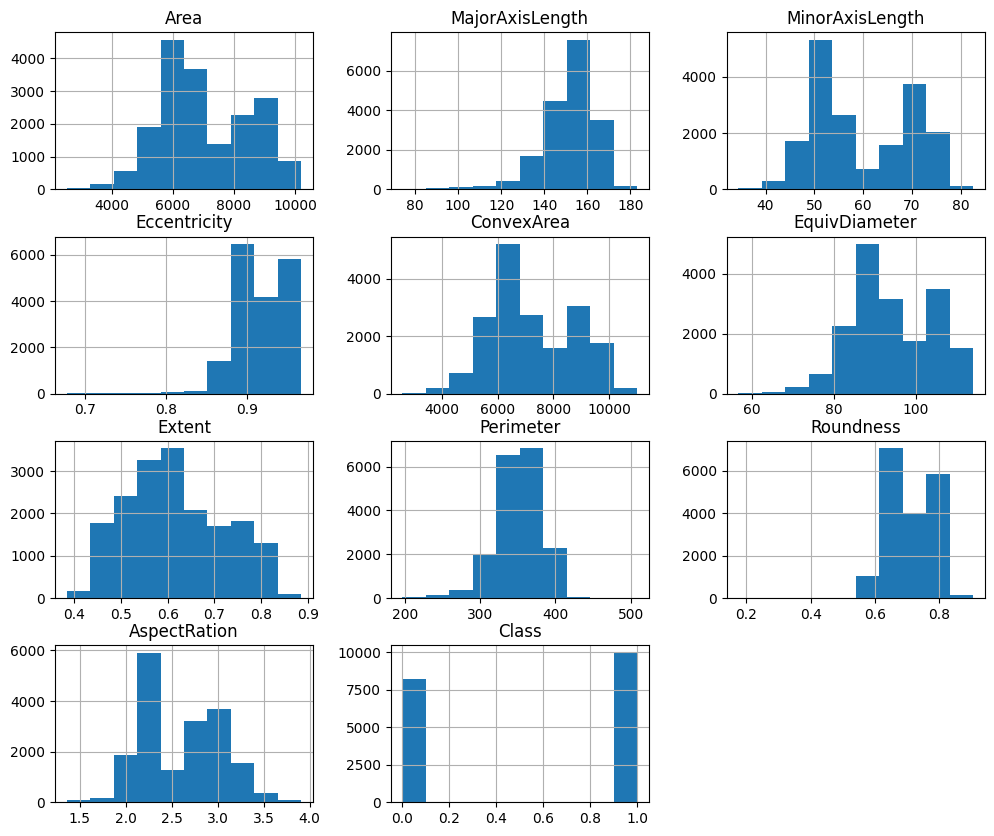

In [72]:
data.hist(figsize=(12,10))
plt.show()

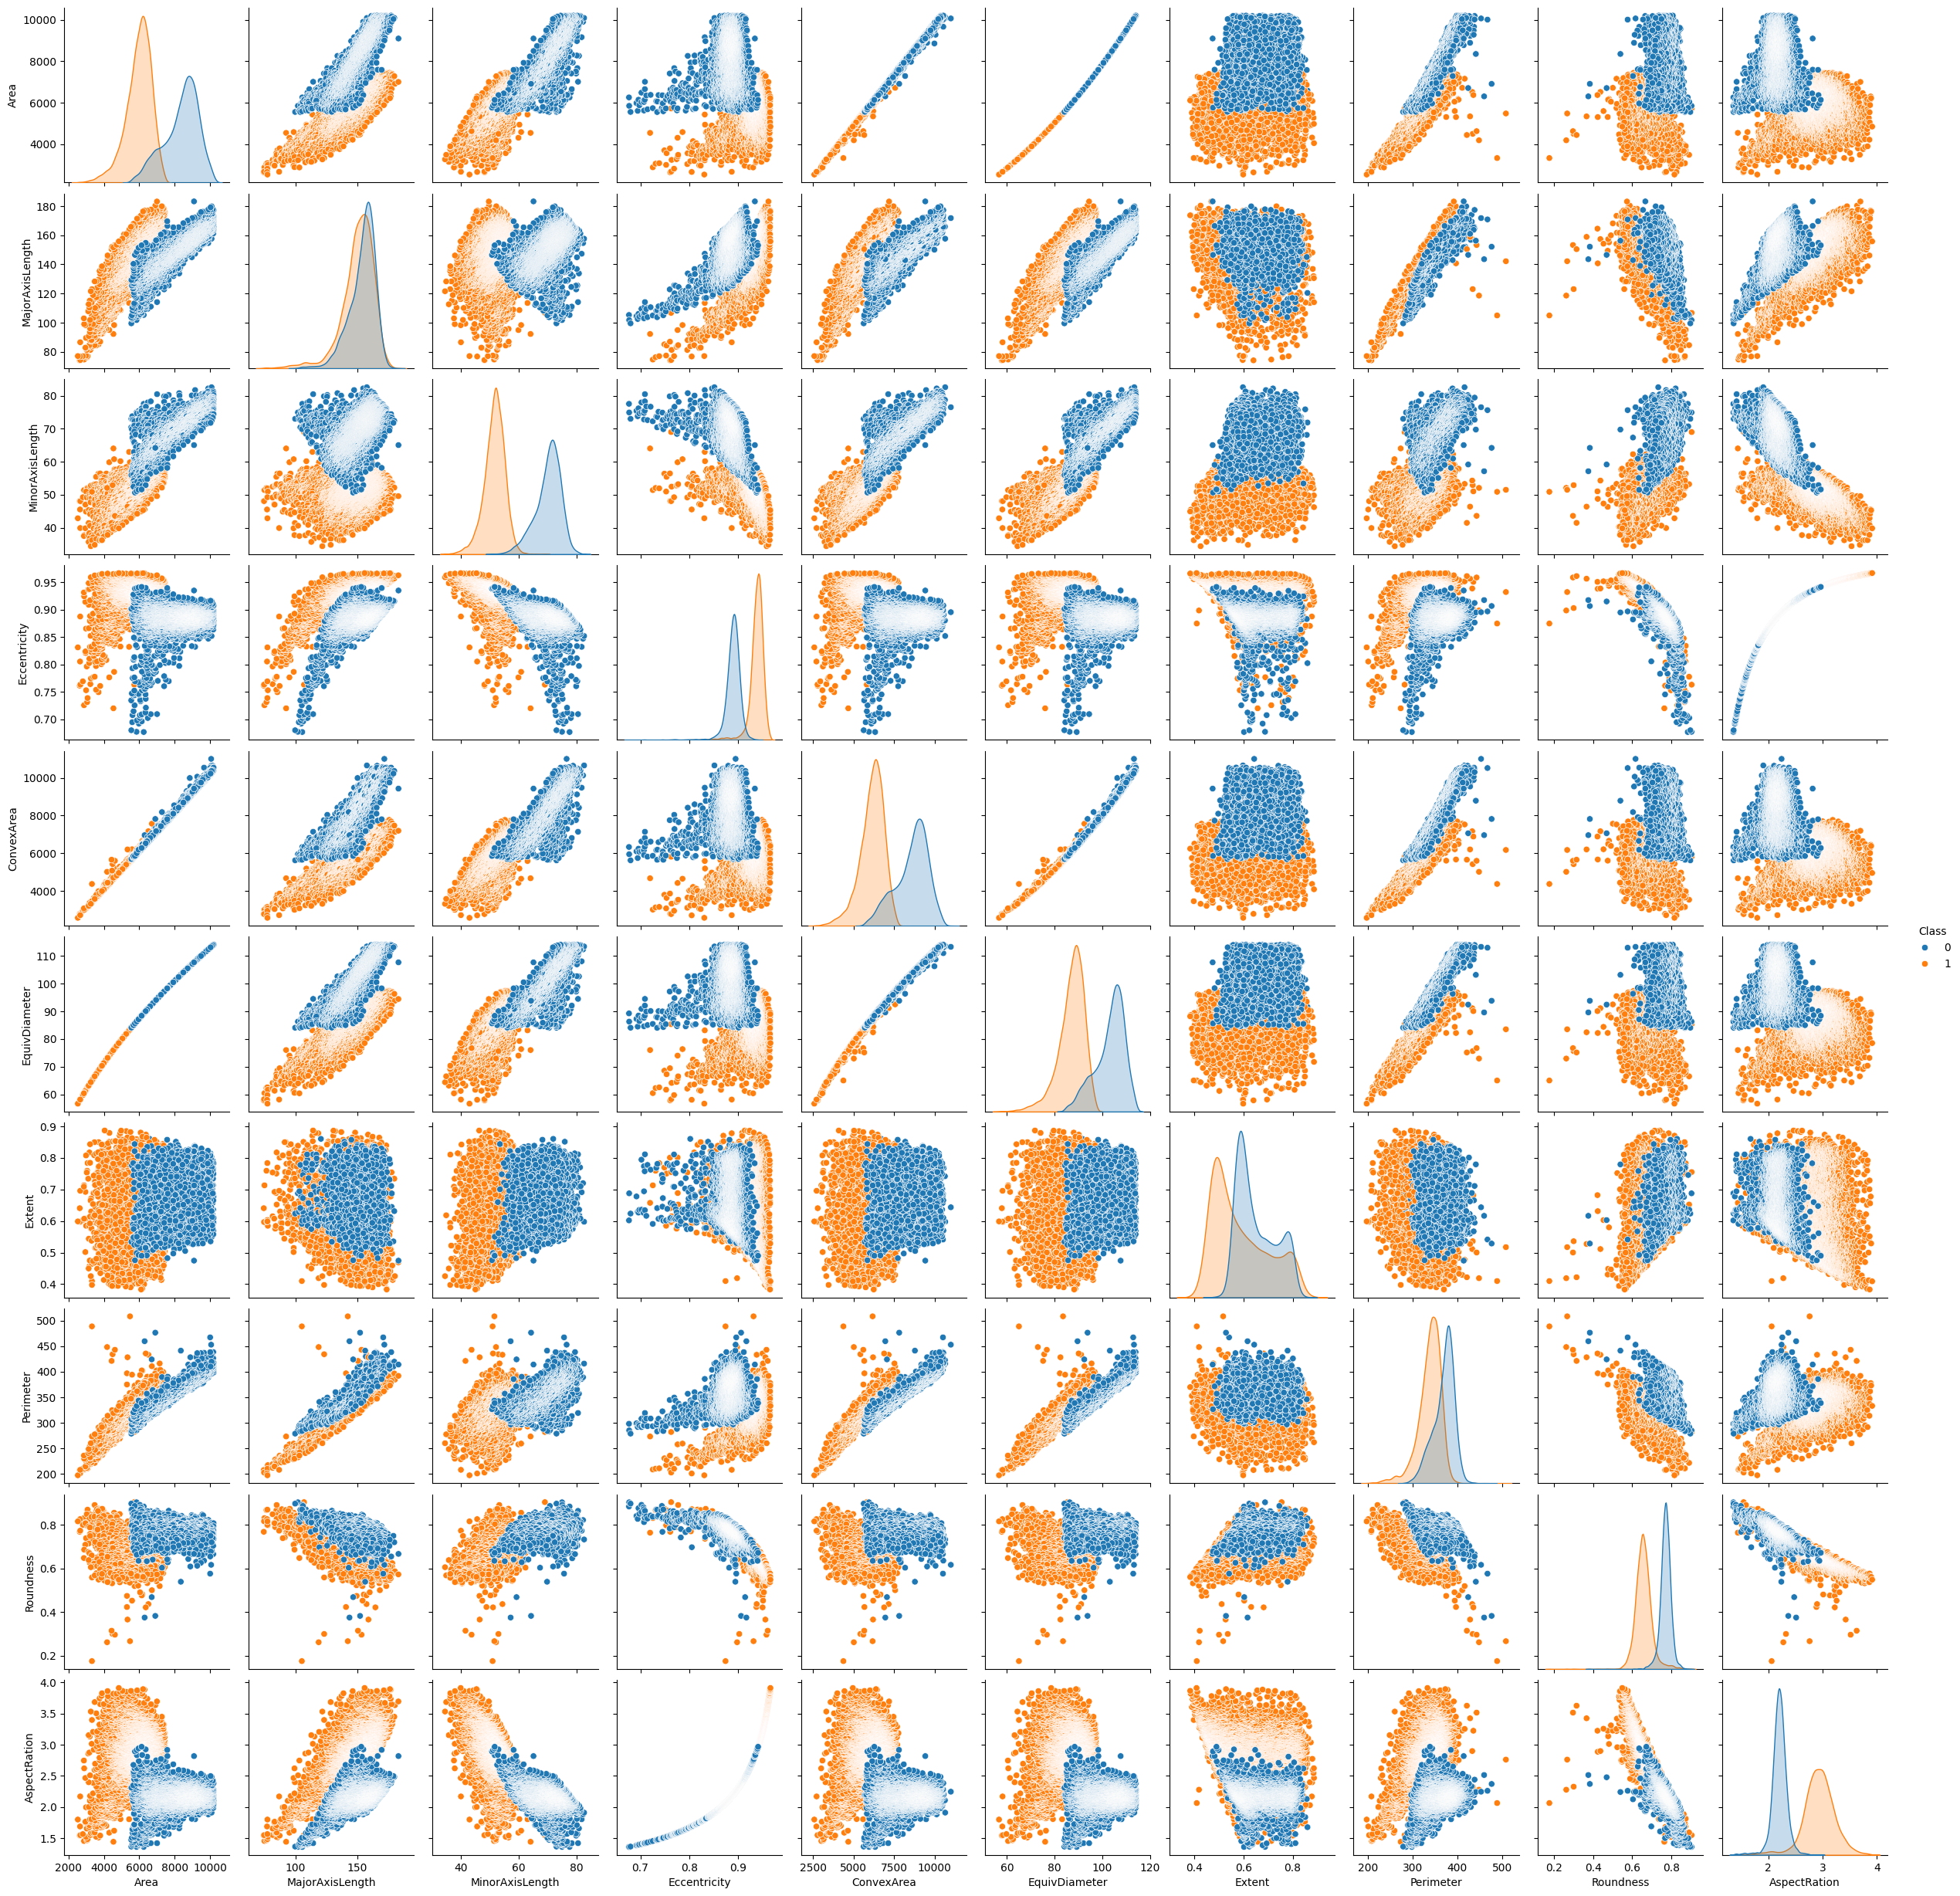

In [73]:
sns.pairplot(data, hue="Class")
plt.show()

In [74]:
X= data.drop("Class", axis=1)
y = data["Class"]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9814 - loss: 0.1355 - val_accuracy: 0.9904 - val_loss: 0.0341
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9904 - val_loss: 0.0312
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0328 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9893 - val_loss: 0.0295
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0346 - val_accuracy: 0.9904 - val_loss: 0.0293
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0270 - val_accuracy: 0.9911 - val_loss: 0.0309
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9907 - val_loss: 0.0304
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0366 - val_accuracy: 0.

In [80]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy * 100)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0308
Test Accuracy: 98.70772361755371


In [81]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


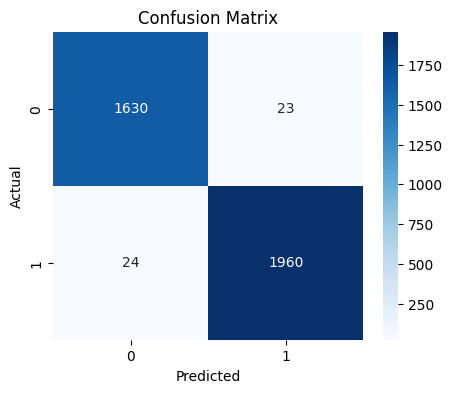

In [82]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [83]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1653
           1       0.99      0.99      0.99      1984

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



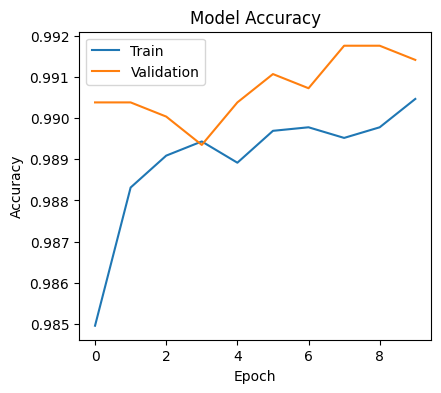

In [84]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

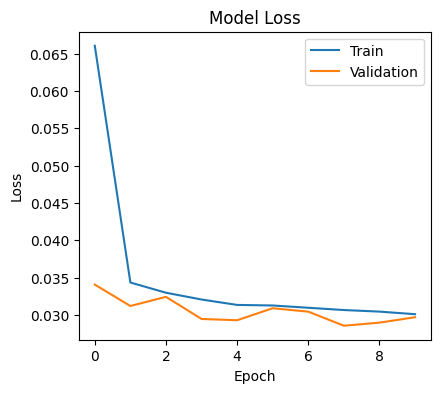

In [85]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()


In [86]:
area = float(input("Enter Area: "))
major = float(input("Enter MajorAxisLength: "))
minor = float(input("Enter MinorAxisLength: "))
ecc = float(input("Enter Eccentricity: "))
convex = float(input("Enter ConvexArea: "))
equiv = float(input("Enter EquivDiameter: "))
extent = float(input("Enter Extent: "))
perimeter = float(input("Enter Perimeter: "))
roundness = float(input("Enter Roundness: "))
aspect = float(input("Enter AspectRatio: "))

Enter Area: 4537
Enter MajorAxisLength: 92
Enter MinorAxisLength: 64
Enter Eccentricity: 0.71
Enter ConvexArea: 4677
Enter EquivDiameter: 76
Enter Extent: 0.80
Enter Perimeter: 300
Enter Roundness: 0.90
Enter AspectRatio: 1.4


In [87]:
user_data = pd.DataFrame([[area, major, minor, ecc, convex, equiv, extent, perimeter, roundness, aspect]])

In [88]:
user_data = scaler.transform(user_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [89]:
prediction = model.predict(user_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [90]:
prediction

array([[0.07464238]], dtype=float32)

In [91]:
predicted_class = (prediction > 0.5).astype(int)

In [92]:
if predicted_class[0][0] == 1:
    print("Predicted Class: 1")
else:
    print("Predicted Class: 0")

Predicted Class: 0


In [93]:
print(data["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64
